In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
upload = files.upload() 

Saving hour.csv to hour.csv


In [ ]:
dataset = pd.read_csv('hour.csv')
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dataset_df = pd.DataFrame(dataset)

In [ ]:
dataset_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
dataset_df['dteday']=pd.to_datetime(dataset_df['dteday'])

In [ ]:
dataset_df['year'] = dataset_df['dteday'].dt.year
dataset_df['month'] = dataset_df['dteday'].dt.month
dataset_df['date'] = dataset_df['dteday'].dt.day

In [ ]:
dataset_df.head

<bound method NDFrame.head of        instant     dteday  season  yr  mnth  ...  registered  cnt  year  month  date
0            1 2011-01-01       1   0     1  ...          13   16  2011      1     1
1            2 2011-01-01       1   0     1  ...          32   40  2011      1     1
2            3 2011-01-01       1   0     1  ...          27   32  2011      1     1
3            4 2011-01-01       1   0     1  ...          10   13  2011      1     1
4            5 2011-01-01       1   0     1  ...           1    1  2011      1     1
...        ...        ...     ...  ..   ...  ...         ...  ...   ...    ...   ...
17374    17375 2012-12-31       1   1    12  ...         108  119  2012     12    31
17375    17376 2012-12-31       1   1    12  ...          81   89  2012     12    31
17376    17377 2012-12-31       1   1    12  ...          83   90  2012     12    31
17377    17378 2012-12-31       1   1    12  ...          48   61  2012     12    31
17378    17379 2012-12-31       1  

In [ ]:
dataset_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'month', 'date'],
      dtype='object')

In [ ]:
dataset_df = dataset_df[['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'year', 'month', 'date']]

In [ ]:
x = dataset_df.drop(['dteday','cnt'],axis=1)
y = dataset_df['cnt']
x.shape

(17379, 18)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.fit(x_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(x_test)
errors = abs(y_pred-y_test)
mape = 100 * (errors / y_test)
accuracy = np.mean(mape)
rms = sqrt(mean_squared_error(y_test, y_pred))
print('MAPE:', round(accuracy, 2), '%.')
print('RMSE:',round(rms,2),)

MAPE: 0.53 %.
RMSE: 21.8


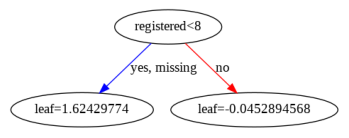

In [ ]:
from xgboost import plot_tree
plot_tree(xgb,num_trees=0)
plt.show()